# Problem 4: Password Cracking
## Algorithmic Strategy: Brute-Force
## Application Domain: Cybersecurity
## Problem Description:
 Attempt to crack a given password using all possible character combinations from a known charset.

## Step1: Imports

In [ ]:
import itertools
import time
import string
import random
import matplotlib.pyplot as plt

## Step2: Data Input

In [ ]:
charset = 'abc12390'
target_password = '1a290'
max_length = 7

## Step3: Apply Brute Force

In [ ]:
def brute_force_crack(target, charset, max_len):
    attempts = 0
    start = time.time()
    for length in range(1, max_len + 1):
        for tup in itertools.product(charset, repeat=length):
            attempts += 1
            attempt = ''.join(tup)
            if attempt == target:
                end = time.time()
                return attempt, attempts, end - start
    end = time.time()
    return None, attempts, end - start

In [ ]:
# Safety check: warn user if parameters may be large
est_total = sum(len(charset)**l for l in range(1, max_length+1))
if est_total > 2_000_000:
    print("WARNING: Estimated attempts =", est_total,
          "\nThis may take a long time. Consider reducing max_length or charset size.")
else:
    print("Estimated attempts:", est_total)

found, attempts, elapsed = brute_force_crack(target_password, charset, max_length)

if found:
    print(f" Password found: '{found}'")
else:
    print(" Password NOT found within given max_length.")

print(f"Attempts: {attempts}")
print(f"Time taken: {elapsed:.6f} seconds")

This may take a long time. Consider reducing max_length or charset size.
 Password found: '1a290'
Attempts: 17280
Time taken: 0.002534 seconds


## Step4: Visualization

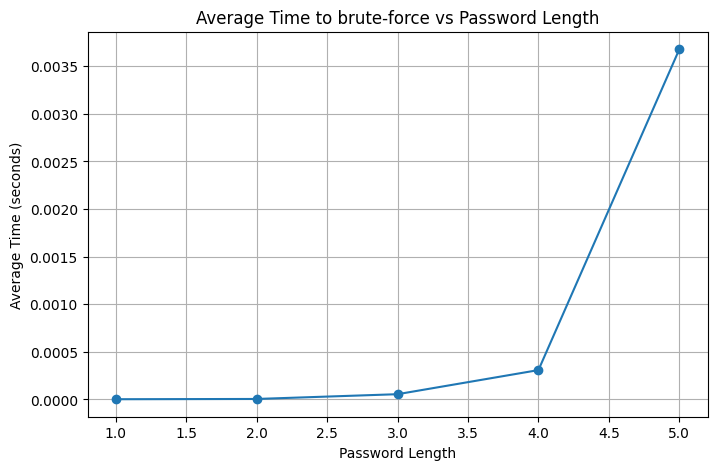

In [ ]:
# Experiment: measure time to crack (or exhaust) for random targets of different lengths
def time_for_length(length, trials=3):
    times = []
    attempts_list = []
    for _ in range(trials):
        target = ''.join(random.choice(charset) for _ in range(length))
        _, attempts, elapsed = brute_force_crack(target, charset, length)
        times.append(elapsed)
        attempts_list.append(attempts)
    return sum(times)/len(times), sum(attempts_list)//len(attempts_list)

lengths = list(range(1, min(6, max_length+1)))
avg_times = []
avg_attempts = []

for L in lengths:
    t, a = time_for_length(L, trials=3)
    avg_times.append(t)
    avg_attempts.append(a)

# Plot: Time vs Length
plt.figure(figsize=(8,5))
plt.plot(lengths, avg_times, marker='o')
plt.title("Average Time to brute-force vs Password Length")
plt.xlabel("Password Length")
plt.ylabel("Average Time (seconds)")
plt.grid(True)
plt.show()

## Obseravtion


*   For short passwords (1–2 characters), the brute-force attack completes almost instantly, as there are only a few possible combinations.
*   As the password length grows (3–4 characters), the number of possible combinations increases rapidly, and so does the time required.

*   By the time the password length reaches 5 characters, the average cracking time rises sharply, forming an exponential curve.